# Task 1
Reproduce Figure 1 from (Candès et al. 2018). [20 points]

Use this version of the paper: https://arxiv.org/abs/1610.02351.

## Figure 1 - left part

### Statmodels

In [2]:
from scipy.stats import bernoulli
from statsmodels.tsa.arima_process import ArmaProcess
from tqdm import tqdm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd

np.random.seed(21)

# Set the AR coefficient
ar_coefficient = 0.5
p = 200
n = 500
replications = 10000

intercept_p_values = []
x1_data_p_values = []

# Generate the AR(1) time series
ar_process = ArmaProcess(ar=[1, -ar_coefficient])

# Calculate the p-values for each run
for i in tqdm(range(replications)):

    X = []
    for j in range(n):
        time_series = ar_process.generate_sample(nsample=p)
        X.append(time_series)

    y = bernoulli.rvs(p=0.5, size=n)

    #sm_model = Logit(y, X).fit(disp=0) #like 1h?
    sm_model = Logit(y, add_constant(X)).fit(disp=0) #like 30min
    intercept_p_values.append(sm_model.pvalues[0])
    x1_data_p_values.append(sm_model.pvalues[1])

df = pd.DataFrame({"intercept p-values": intercept_p_values, "x1 p-values": x1_data_p_values})

df.to_csv("p_values_left.csv", index=False)

100%|██████████| 10000/10000 [34:59<00:00,  4.76it/s] 


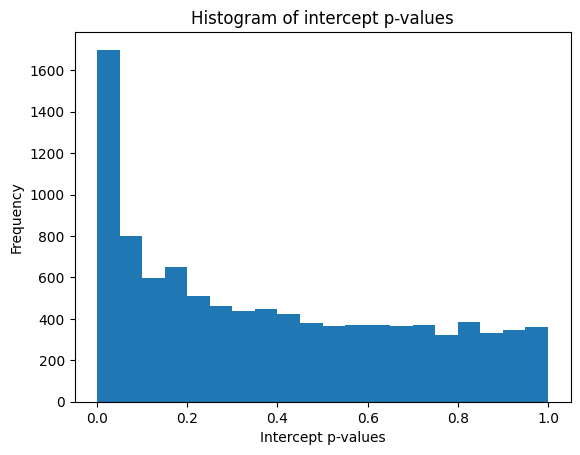

In [3]:
import matplotlib.pyplot as plt

# Show a histogram of the p-values
plt.hist(df["intercept p-values"], bins=20) #paper has 20 bins
plt.xlabel('Intercept p-values')
plt.ylabel('Frequency')
plt.title('Histogram of intercept p-values')
plt.show()

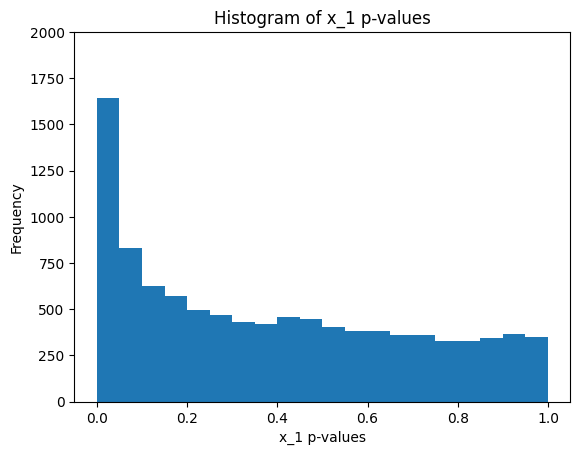

In [5]:
import matplotlib.pyplot as plt

# Show a histogram of the p-values
plt.hist(df['x1 p-values'], bins=20) #paper has 20 bins
plt.xlabel('x_1 p-values')
plt.ylabel('Frequency')
plt.ylim((0, 2000))
plt.title('Histogram of x_1 p-values')
plt.show()

### Loading generated p-values

In [1]:
import pandas as pd

df = pd.read_csv("p_values.csv")

In [2]:
df

,intercept p-values,x1 p-values
0,0.391406,0.790353
1,0.437404,0.023153
2,0.463677,0.893404
3,0.840421,0.475078
4,0.951833,0.000407
...,...,...
9995,0.675893,0.138250
9996,0.026954,0.032387
9997,0.039965,0.145917
9998,0.749626,0.663526
